# MATH&ML-11. Кластеризация и техники понижения размерности. Часть II

##  1. Введение

✍ В предыдущем модуле мы изучили ряд методов кластеризации и научились применять их для решения практических задач. Однако мы пока не ответили на два вопроса.

Во-первых, мы не разобрались с тем, как оценивать качество.

К сожалению, оценить качество кластеризации сложно, поскольку, в отличие от регрессии или классификации, при кластеризации у нас не всегда есть эталонные ответы, с которыми можно сравнить результаты предсказаний.

Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

**Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.

**Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

Разумеется, мы разберём обе группы методов и рассмотрим практически все существующие на данный момент меры, которые можно использовать для оценки качества кластеризации.

Во-вторых, мы упомянули, что из-за большого количества признаков разбиение на кластеры может получиться некачественным и необходимо уменьшать размерность данных, однако не обсудили подходящие для этого алгоритмы.

В этом модуле мы подробно разберём процесс снижения размерности, а также на примере практической задачи увидим, как снижение размерности увеличивает качество кластеризации.

Но прежде чем перейти к изучению материала, давайте повторим то, что вы узнали ранее, так как в этом модуле мы будем активно использовать эти знания. Если какие-то задания вызовут у вас затруднения, рекомендуем ещё раз просмотреть соответствующие юниты предыдущего модуля.

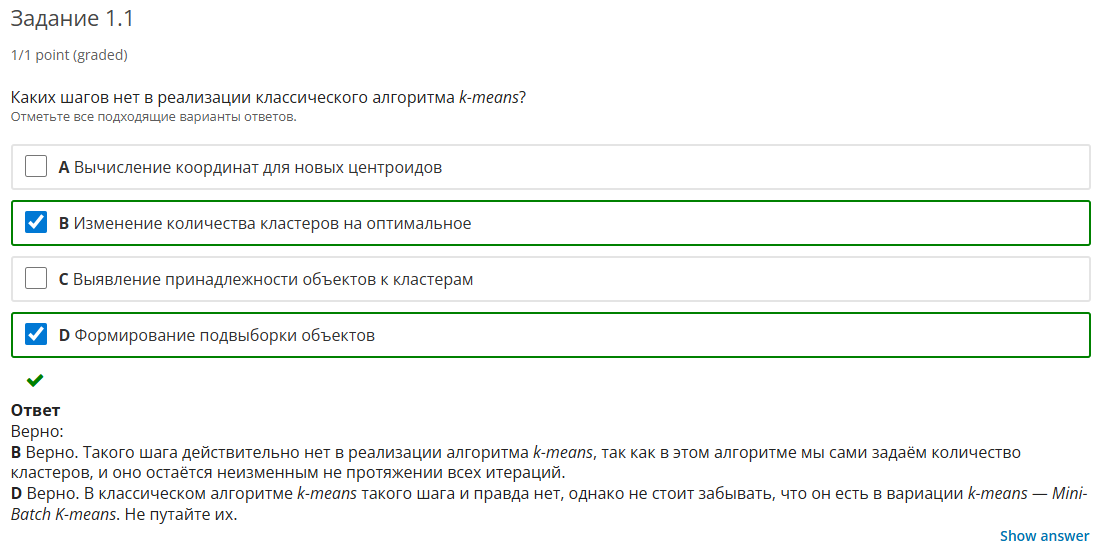

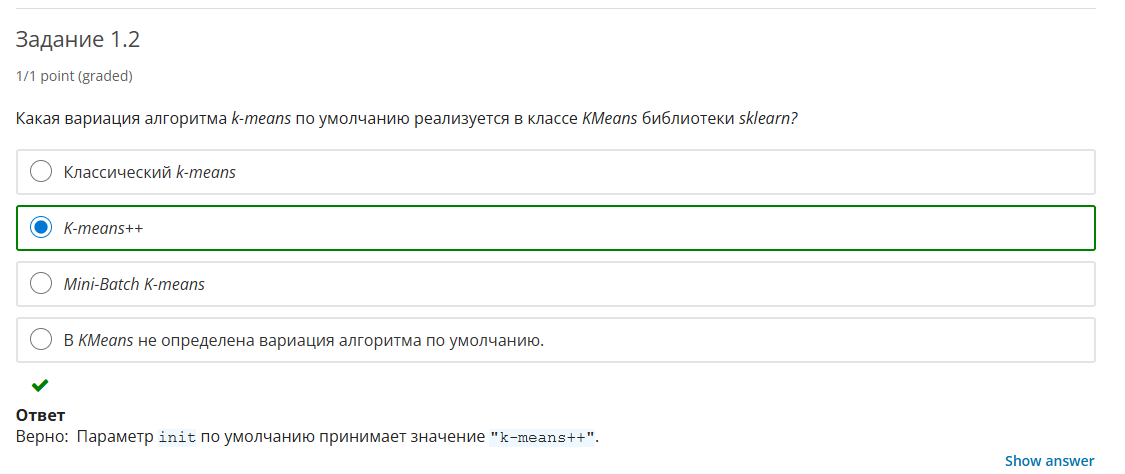

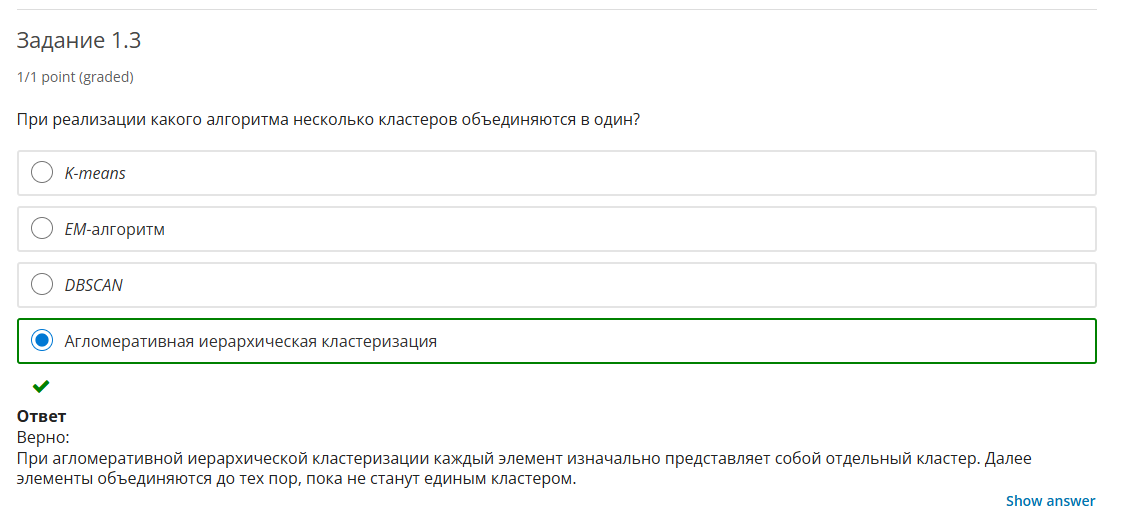

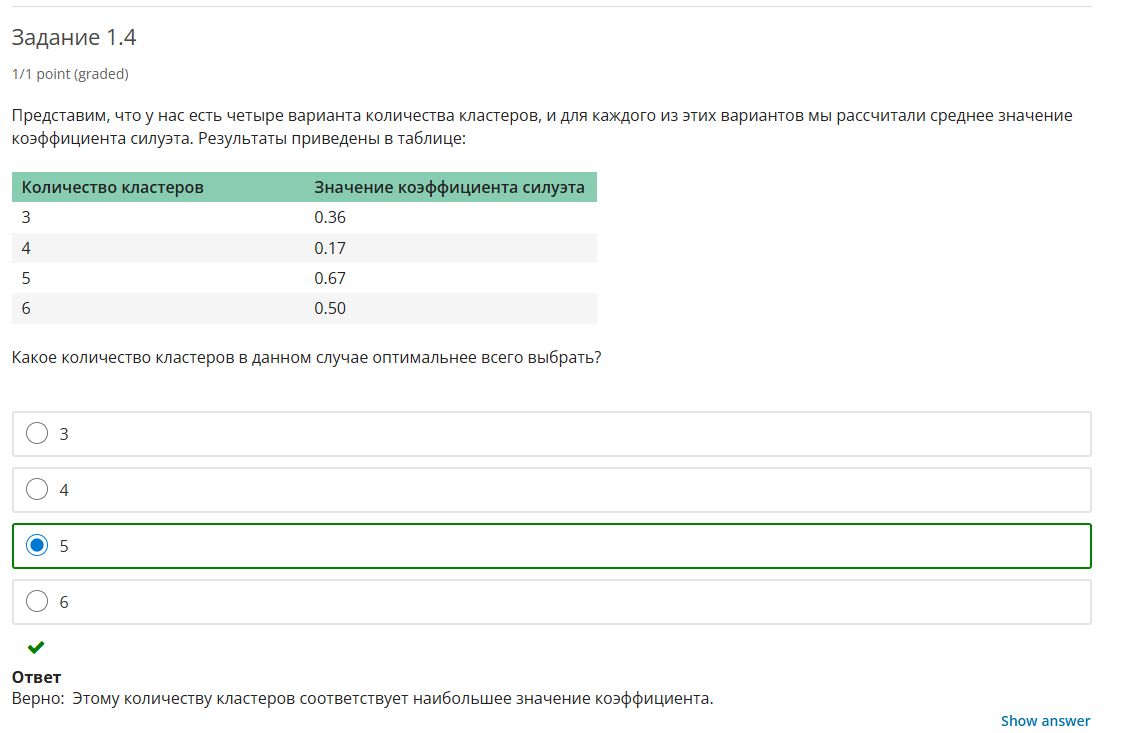

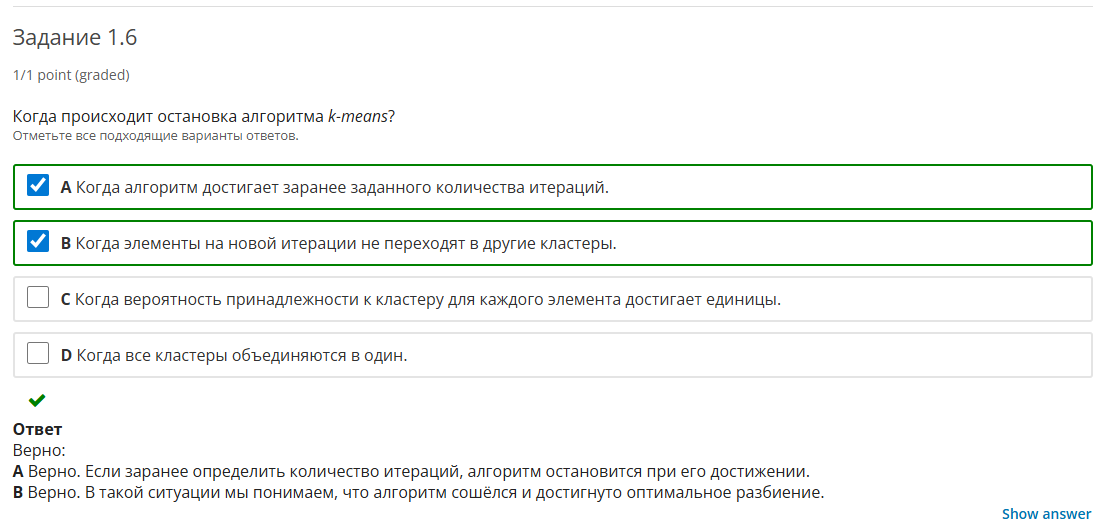

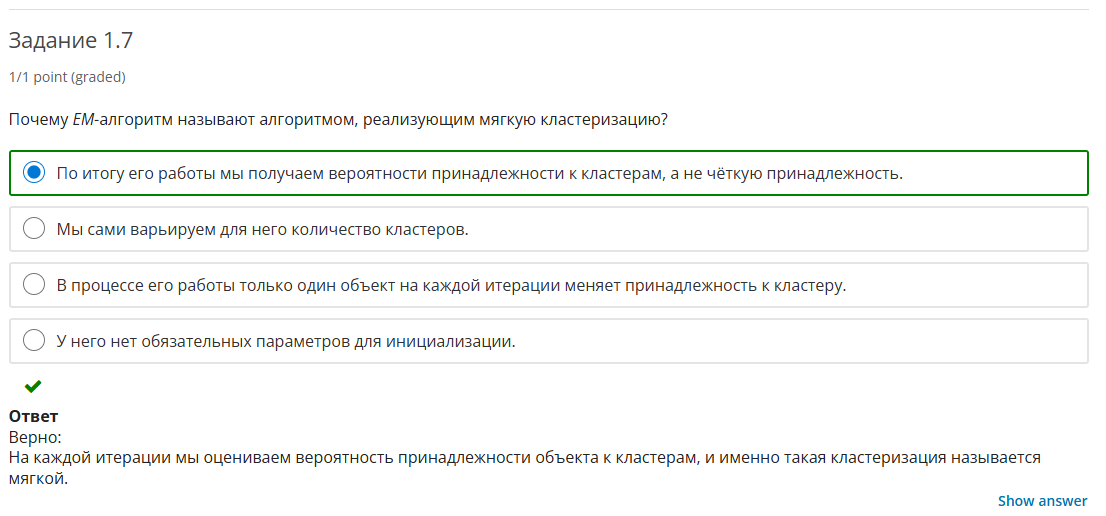

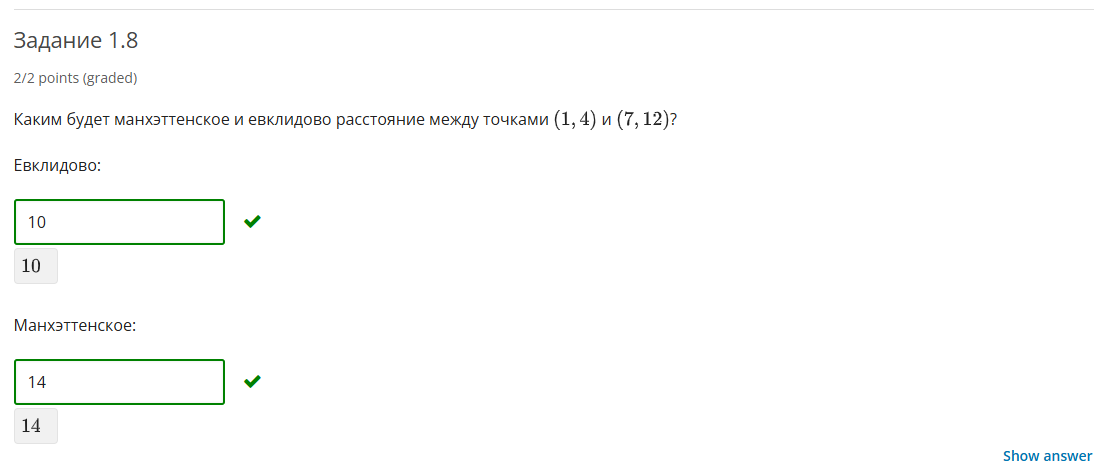

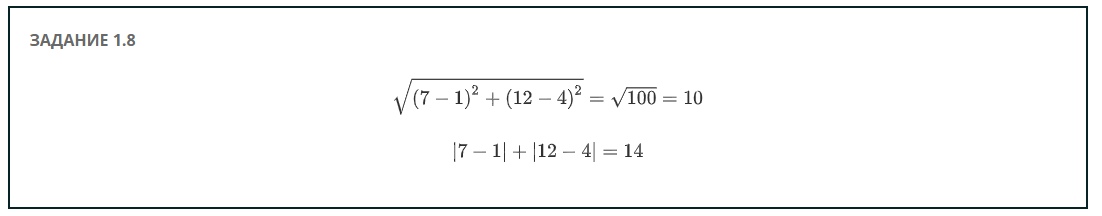

⭐ Отлично! Вы справились со всеми заданиями, а значит, можно переходить к изучению новой темы.

В рамках данного модуля перед нами будут стоять следующие цели:

- Изучить метрики, с помощью которых можно оценить качество кластеризации: мы рассмотрим все внешние и внутренние меры, а также на примере практической задачи научимся вычислять их вручную и с помощью библиотеки sklearn.
- Познакомиться с методами снижения размерности: мы узнаем, зачем необходимо уменьшать размерность, изучим алгоритмы, с помощью которых это можно делать, и, конечно, отработаем полученные навыки на практике.

# 2. Оценка качества кластеризации: внутренние меры

В библиотеке sklearn реализованы три наиболее популярные метрики:

- коэффициент силуэта (Silhouette Coefficient);
- индекс Калински — Харабаса (Calinski-Harabasz Index);
- индекс Дэвиса — Болдина (Davies-Bouldin Index).

Эти метрики мы рассмотрим максимально подробно, а также вычислим каждую из них «вручную». Важно отметить, что вам не потребуется в будущем реализовывать подобные вычисления самостоятельно, однако разбор вычислительных примеров поможет лучше разобраться в том, как рассчитываются значения и каков их смысл.

### Коэффициент силуэта

Некоторые внутренние меры вам уже знакомы по предыдущему модулю, например **коэффициент силуэта**. Мы не зря акцентируем на нём внимание — именно он используется чаще всего и именно о нём вас с наибольшей вероятностью могут спросить на собеседовании. Обсудим коэффициент силуэта немного подробнее.

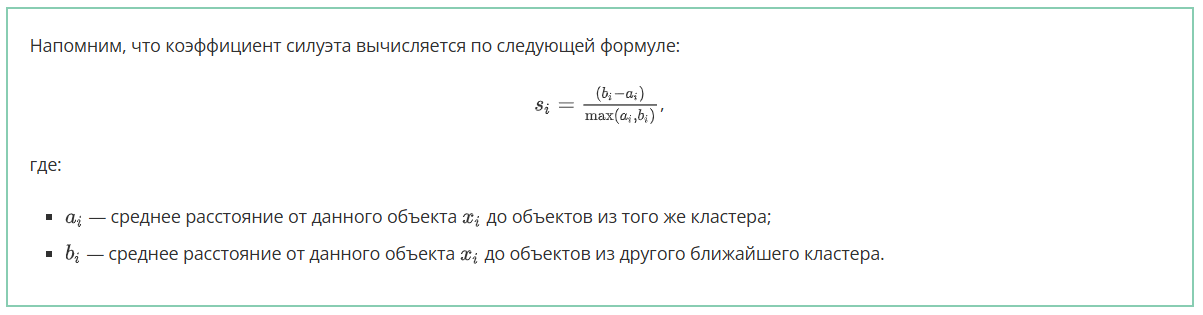

Давайте рассмотрим вычисление коэффициента силуэта на примере.

Допустим, у нас есть семь объектов, разделённых на три кластера.

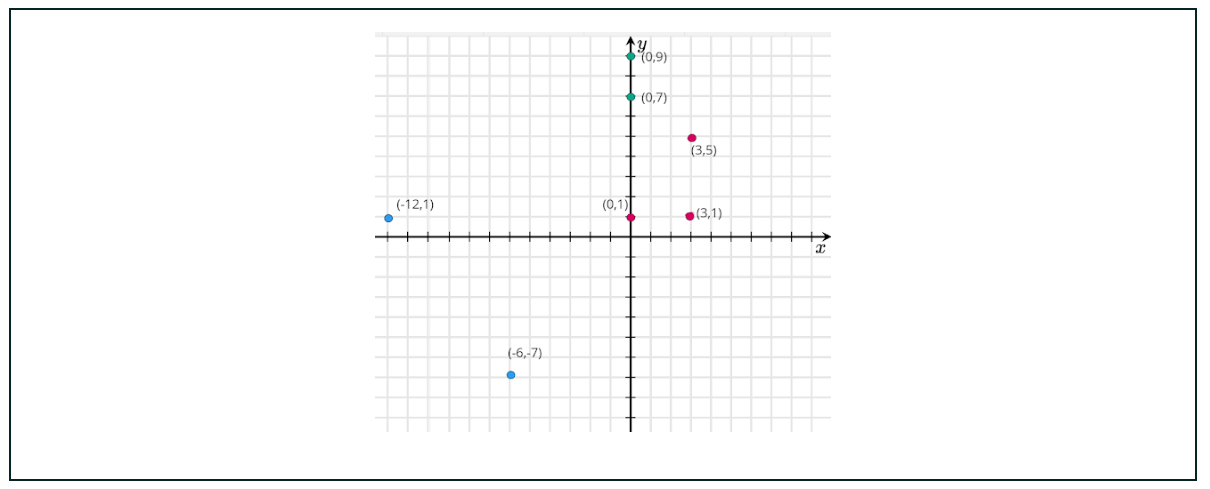

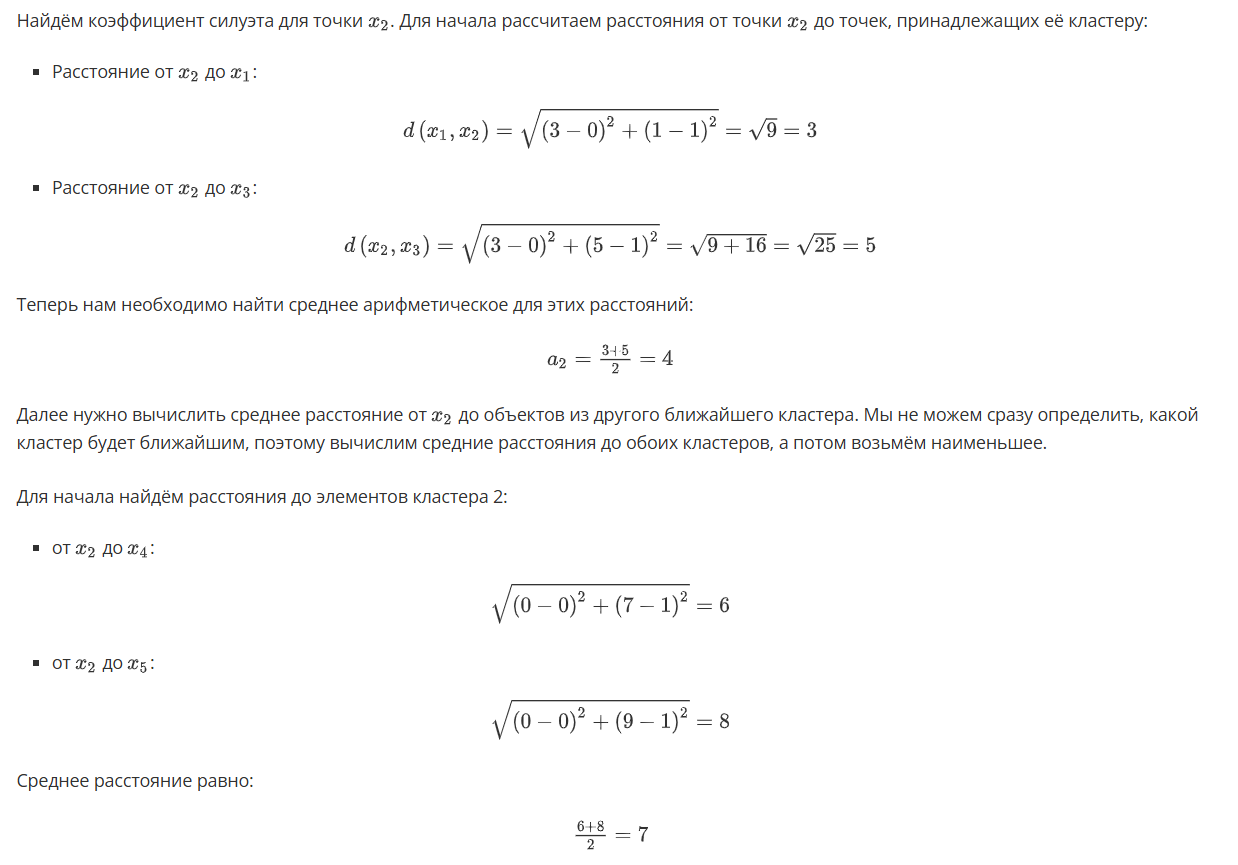

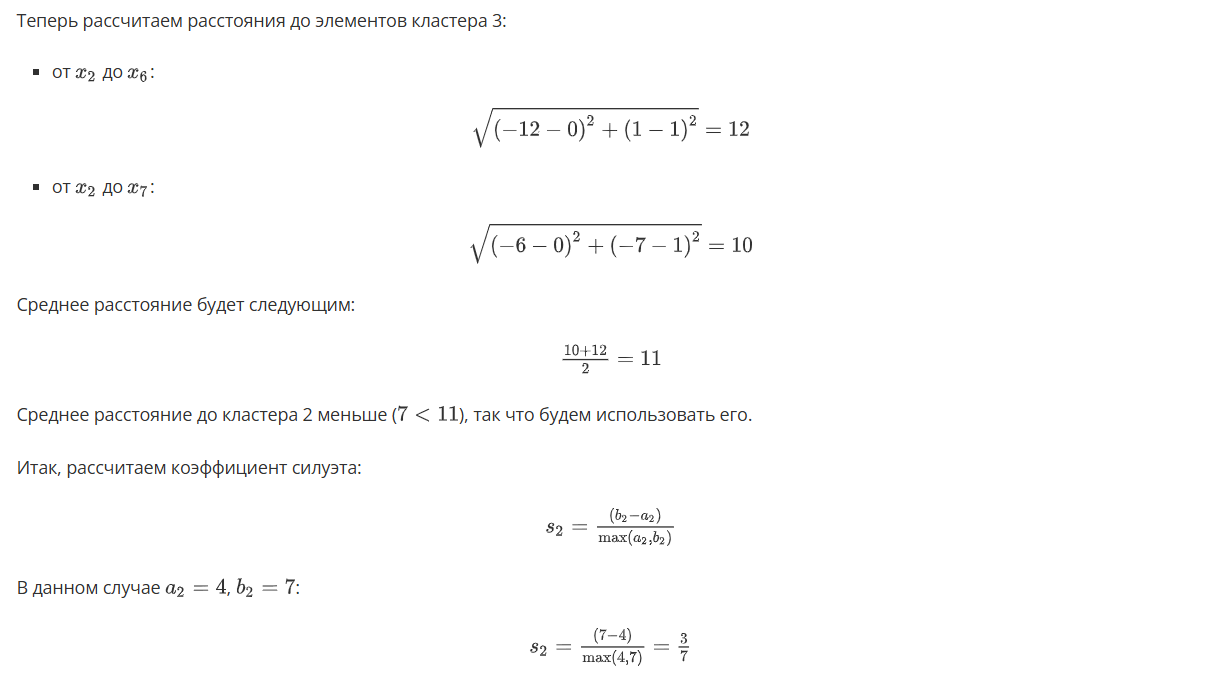

Отлично, мы нашли значение коэффициента силуэта для X2. Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных шести объектов, а затем усреднить семь значений, однако мы опустим эти вычисления — надеемся, что алгоритм действий вам уже и так понятен.

При решении практических задач вы будете использовать уже готовые алгоритмы на Python. Для вычисления коэффициента силуэта в библиотеке sklearn используется silhouette_score:

In [ ]:
import sklearn
from sklearn.cluster import KMeans

#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

- Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
- Значение близко к 0: кластеры пересекаются друг с другом.
- Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

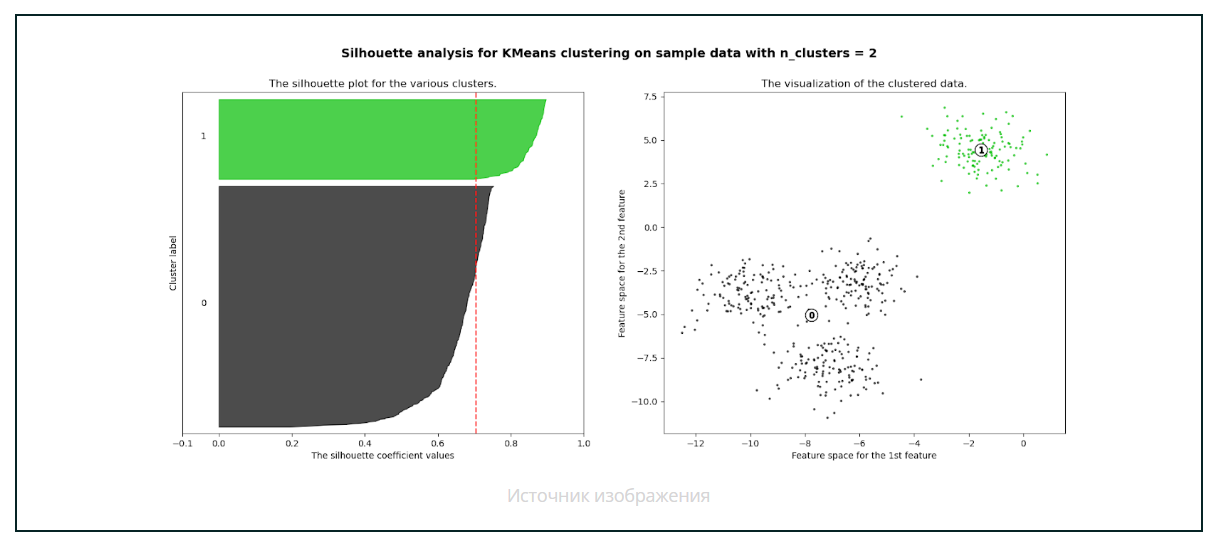

Пояснение. На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

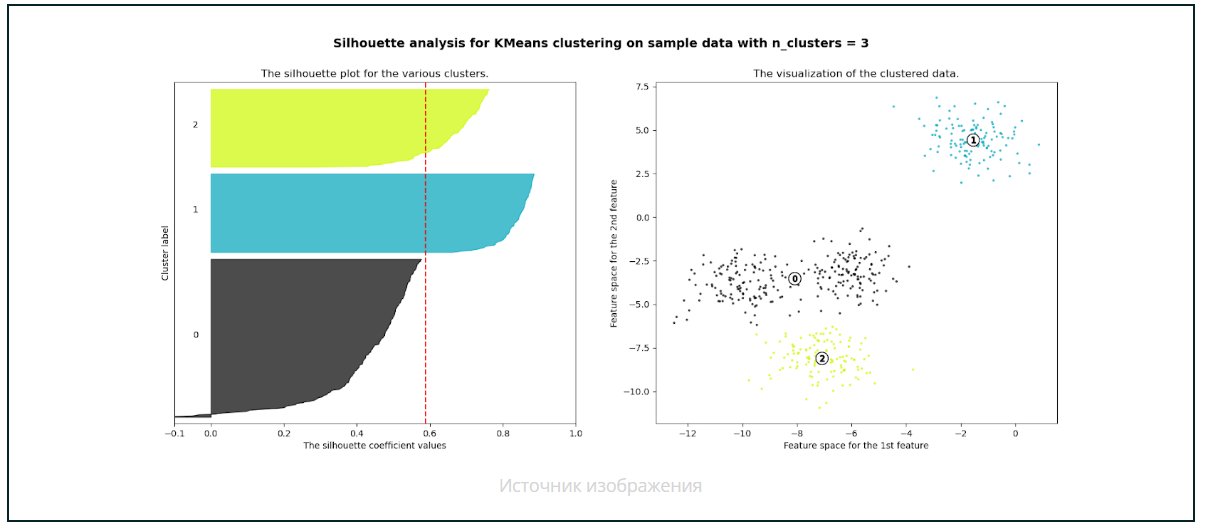

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

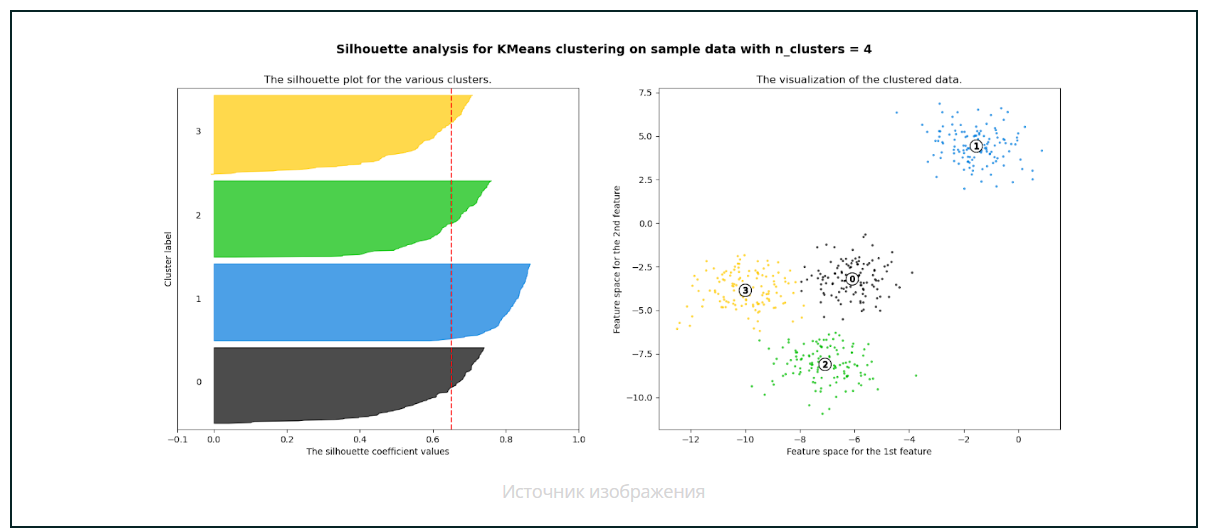

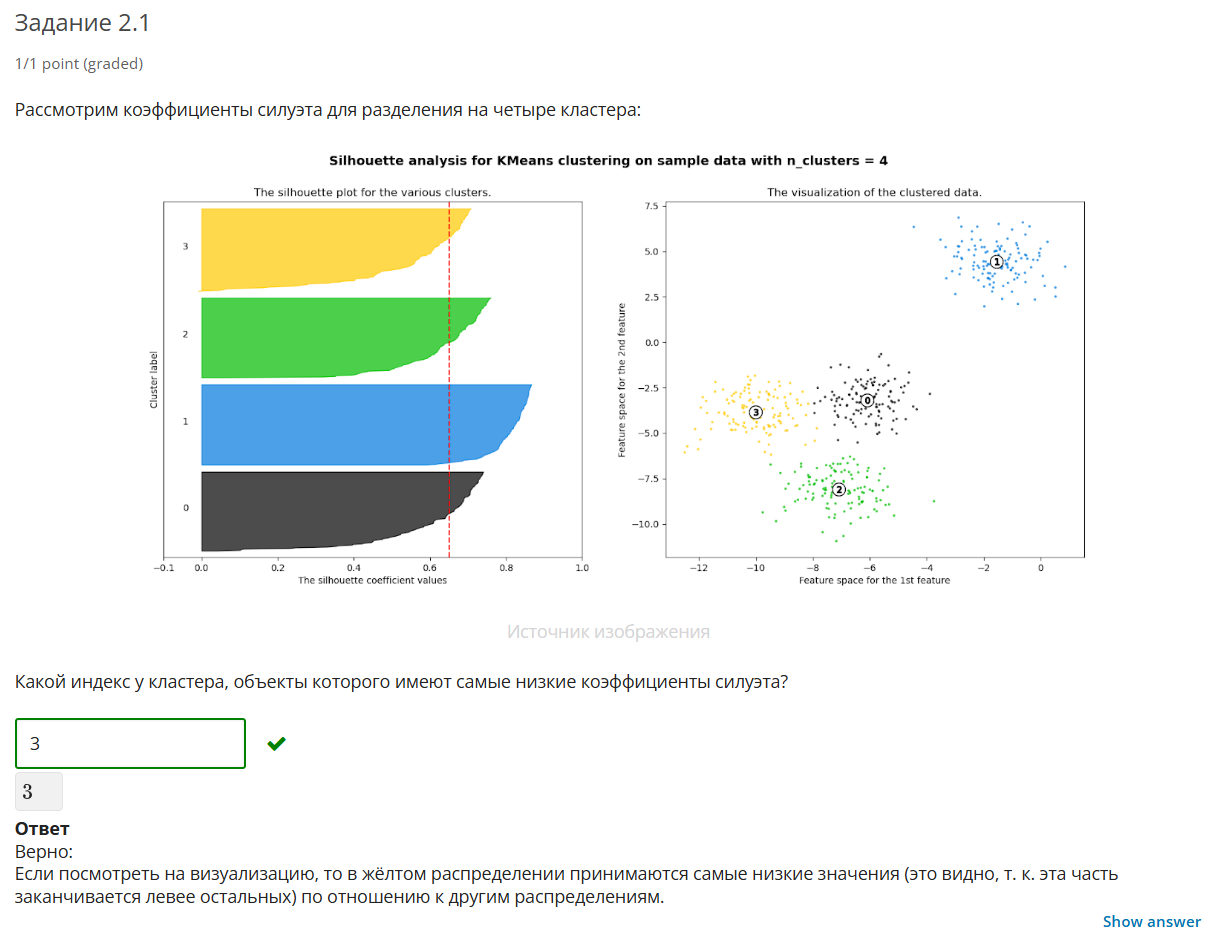

### 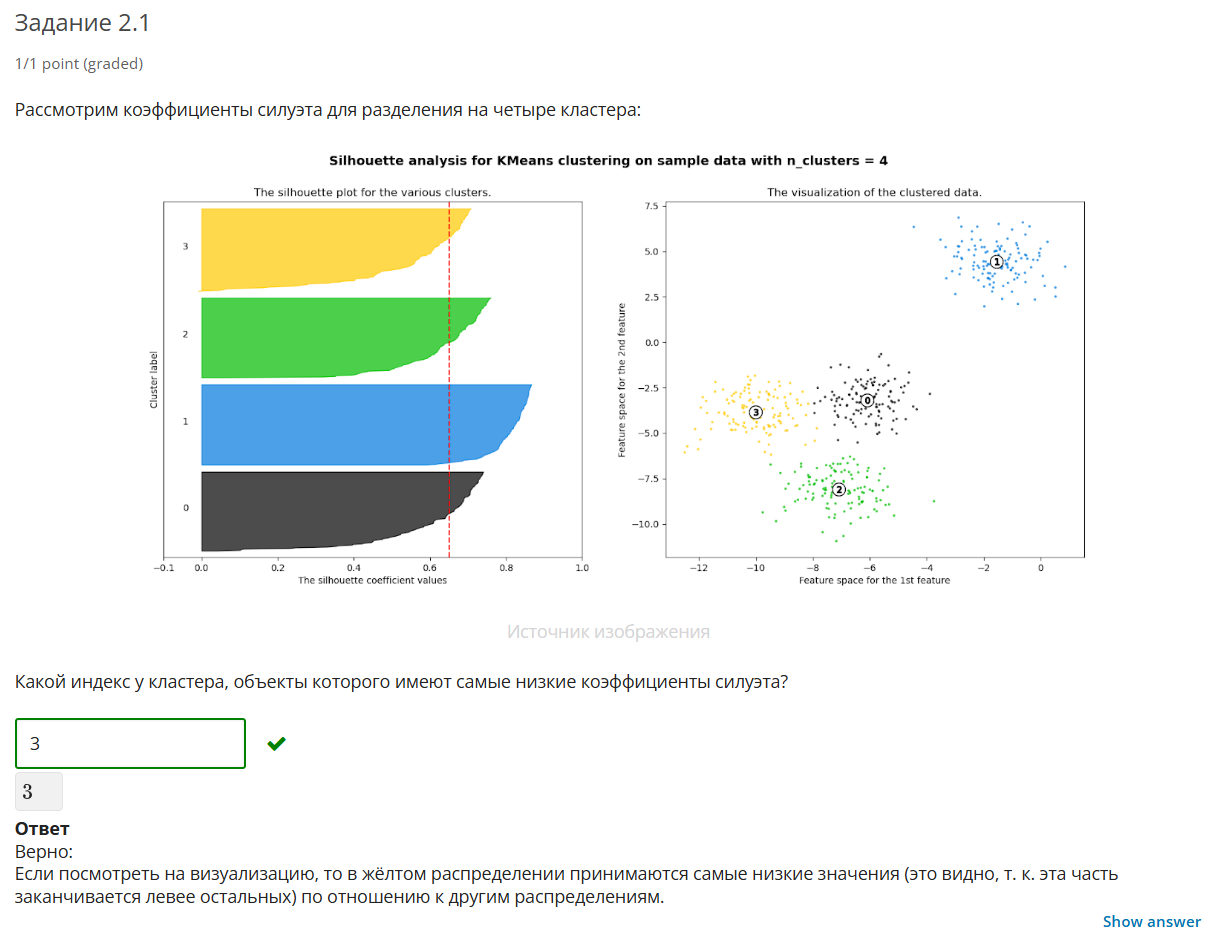

### Индекс Калински — Харабаса

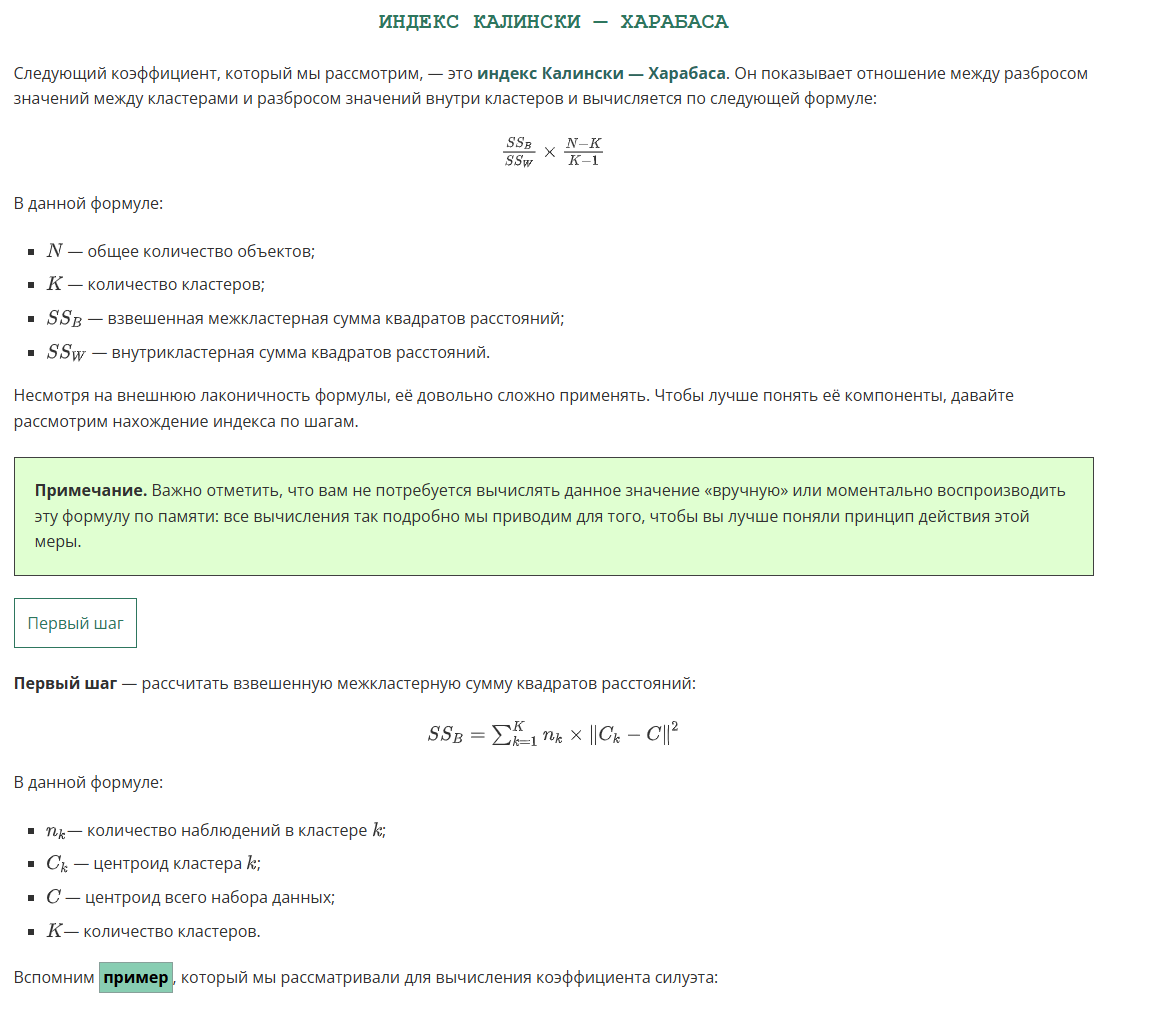

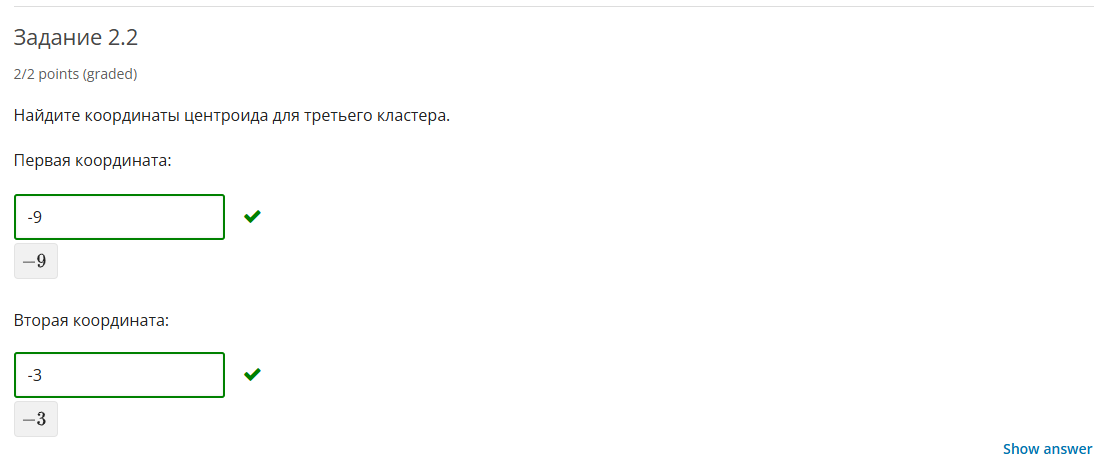

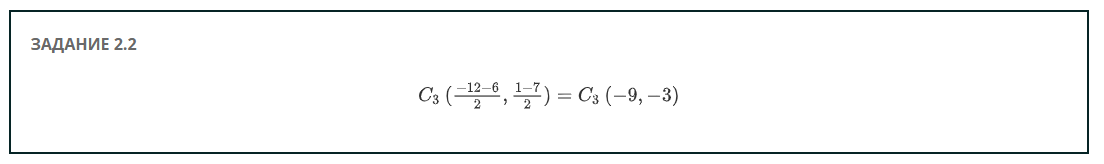

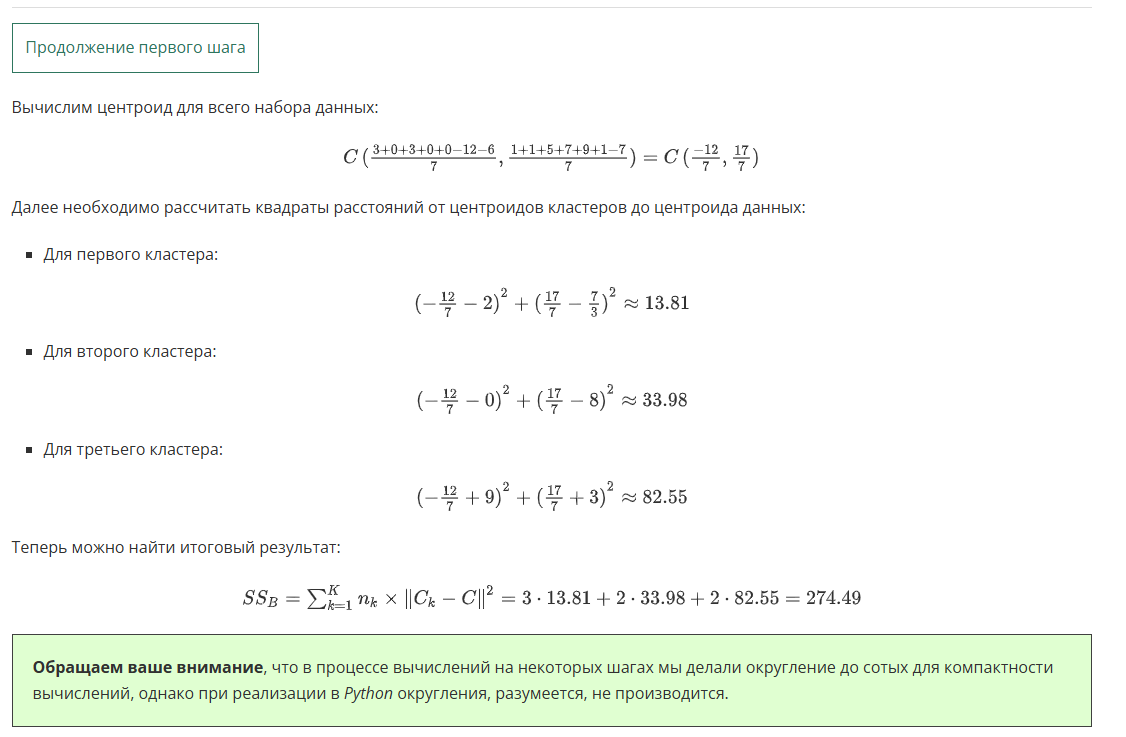

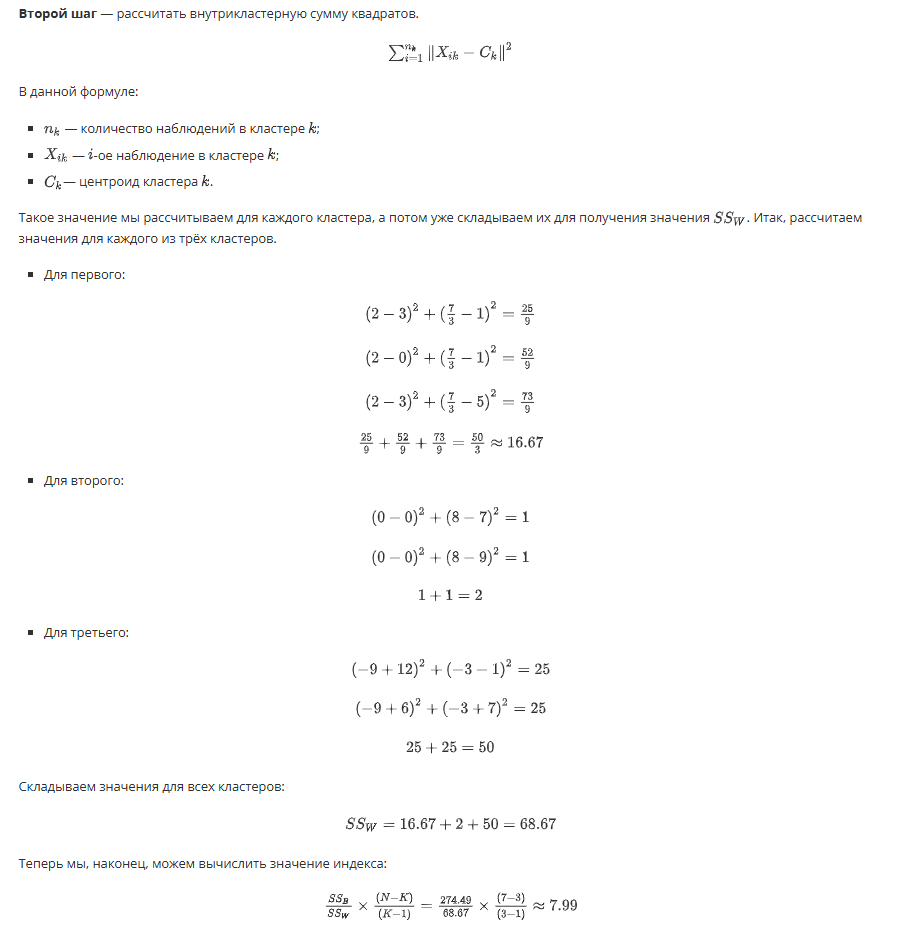

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

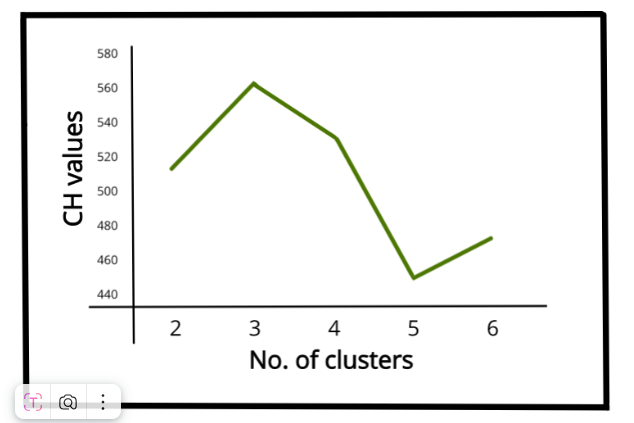

Пояснение: по оси абсцисс здесь отложено количество кластеров, а по оси ординат — значение индекса Калински — Харабаса.

В библиотеке sklearn данный алгоритм реализуется с помощью метода calinski_harabasz_score():

In [ ]:
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)